In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import pyqtgraph
import pickle
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [64]:
# pyqtgraph.examples.run()

In [65]:
df = pd.read_csv("usa_00004.csv")

In [66]:
df.replace({9999999: np.NaN, 9999998: np.NaN, 99999:np.NaN, 999999:np.NaN}, inplace=True)

In [67]:
df.dropna(inplace=True)
pickle.dump(df, open("save.p", "wb"))

df.isna().sum()
df.describe().round(2)

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,RELATE,RELATED,SEX,AGE,BIRTHQTR,MARST,BIRTHYR,MARRNO,MARRINYR,YRMARR,DIVINYR,WIDINYR,RACE,RACED,HISPAN,HISPAND,BPL,BPLD,ANCESTR1,ANCESTR1D,ANCESTR2,ANCESTR2D,CITIZEN,YRNATUR,YRIMMIG,YRSUSA1,YRSUSA2,LANGUAGE,LANGUAGED,SPEAKENG,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,SCHLTYPE,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,INCTOT,FTOTINC,INCWAGE,INCSS,INCWELFR,INCINVST,INCRETIR,INCSUPP,INCOTHER,INCEARN,POVERTY,VETDISAB,DIFFREM,DIFFPHYS,DIFFMOB,DIFFCARE,DIFFSENS,DIFFEYE,DIFFHEAR
count,2492052.0,2492052.0,2492052.00,2.492052e+06,2492052.00,2.492052e+06,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.0,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.0,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00,2492052.00
mean,2018.0,201801.0,703407.72,2.018001e+12,96.24,2.018007e+12,461556.95,1.00,1.76,102.01,2.44,246.31,1.52,49.36,2.52,2.95,1968.64,0.97,0.75,1465.24,0.75,0.74,1.73,174.91,0.26,26.91,80.57,8058.04,469.1,4691.35,786.49,7865.03,0.35,9357.18,310.32,3.92,0.61,5.02,502.16,3.25,1.11,7.37,75.98,0.61,6.21,1.13,13.60,1361.68,1.52,152.08,45195.82,95657.06,32488.55,3566.25,32.09,2845.42,3058.37,267.01,714.0,34712.69,335.09,0.17,1.05,1.08,1.06,1.03,1.07,1.03,1.05
std,0.0,0.0,409877.32,4.043683e+05,75.91,4.098773e+06,927761.84,0.07,1.06,82.99,2.67,271.75,0.50,19.00,1.11,2.21,19.00,0.76,0.47,878.42,0.51,0.45,1.78,182.08,0.81,86.92,135.58,13561.59,420.3,4202.93,387.98,3879.64,0.87,2173.23,722.61,11.26,1.52,11.30,1131.16,0.69,0.31,2.44,24.40,1.79,18.18,0.39,22.29,2231.30,8.59,859.66,65958.25,103480.59,57758.08,7297.35,471.87,21435.86,12697.59,1766.94,4821.9,60965.47,161.15,0.72,0.22,0.28,0.23,0.17,0.25,0.16,0.22
min,2018.0,201801.0,2293.00,2.018000e+12,1.00,2.018000e+12,10001.00,1.00,1.00,1.00,1.00,101.00,1.00,16.00,1.00,1.00,1922.00,0.00,0.00,0.00,0.00,0.00,1.00,100.00,0.00,0.00,1.00,100.00,1.0,10.00,1.00,10.00,0.00,1939.00,0.00,0.00,0.00,1.00,100.00,1.00,1.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-11200.00,-16400.00,0.00,0.00,0.00,-3200.00,0.00,0.00,0.0,-9999.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2018.0,201801.0,341493.75,2.018000e+12,51.00,2.018003e+12,90005.00,1.00,1.00,53.00,1.00,101.00,1.00,33.00,2.00,1.00,1954.00,0.00,0.00,0.00,0.00,0.00,1.00,100.00,0.00,0.00,18.00,1800.00,50.0,500.00,935.00,9350.00,0.00,9999.00,0.00,0.00,0.00,1.00,100.00,3.00,1.00,6.00,63.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,10000.00,35000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,197.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,2018.0,201801.0,700037.00,2.018001e+12,76.00,2.018007e+12,220018.00,1.00,1.00,80.00,1.00,101.00,2.00,50.00,3.00,1.00,1968.00,1.00,1.00,1983.00,1.00,1.00,1.00,100.00,0.00,0.00,36.00,3600.00,226.0,2260.00,999.00,9990.00,0.00,9999.00,0.00,0.00,0.00,1.00,100.00,3.00,1.00,7.00,71.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,28000.00,68950.00,12000.00,0.00,0.00,0.00,0.00,0.00,0.0,15000.00,362.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,2018.0,201801.0,1064954.00,2.018001e+12,117.00,2.018011e+12,410336.00,1.00,2.00,123.00,2.00,201.00,2.00,64.00,4.00,6.00,1985.00,1.00,1.00,2002.00,1.00,1.00,1.00,100.00,0.00,0.00,48.00,4800.00,940.0,9400.00,999.00,9990.00,0.00,9999.00,0.00,0.00,0.00,1.00,100.00,3.00,1.00,10.00,101.00,0.00,0.00,1.00,23.00,2311.00,0.00,0.00,56000.00,120000.00,45000.00,0.00,0.00,0.00,0.00,0.00,0.0,48000.00,501.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,2018.0,201801.0,1410976.00,2.018001e+12,2097.00,2.018014e+12,7030155.00,5.00,20.00,2097.00

In [74]:
df['>50K'] = df['INCTOT'].apply(lambda x: 1 if x > 50000 else 0)
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,RELATE,RELATED,SEX,AGE,BIRTHQTR,MARST,BIRTHYR,MARRNO,MARRINYR,YRMARR,DIVINYR,WIDINYR,RACE,RACED,HISPAN,HISPAND,BPL,BPLD,ANCESTR1,ANCESTR1D,ANCESTR2,ANCESTR2D,CITIZEN,YRNATUR,YRIMMIG,YRSUSA1,YRSUSA2,LANGUAGE,LANGUAGED,SPEAKENG,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,SCHLTYPE,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,INCTOT,FTOTINC,INCWAGE,INCSS,INCWELFR,INCINVST,INCRETIR,INCSUPP,INCOTHER,INCEARN,POVERTY,VETDISAB,DIFFREM,DIFFPHYS,DIFFMOB,DIFFCARE,DIFFSENS,DIFFEYE,DIFFHEAR,>50K
2292,2018.0,201801.0,2293.0,2.018000e+12,192.0,2.018000e+12,210001.0,1.0,1.0,192.0,1.0,101.0,1.0,70.0,3.0,1.0,1948.0,1.0,1.0,1965.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,940.0,9400.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60900.0,96400.0,24000.0,20400.0,0.0,0.0,16500.0,0.0,0.0,24000.0,501.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1
2293,2018.0,201801.0,2293.0,2.018000e+12,192.0,2.018000e+12,210001.0,1.0,2.0,170.0,2.0,201.0,2.0,71.0,4.0,1.0,1947.0,1.0,1.0,1965.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,940.0,9400.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35500.0,96400.0,26000.0,9500.0,0.0,0.0,0.0,0.0,0.0,26000.0,501.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2294,2018.0,201801.0,2294.0,2.018000e+12,36.0,2.018000e+12,180001.0,1.0,1.0,37.0,1.0,101.0,1.0,60.0,1.0,1.0,1958.0,3.0,1.0,2006.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,87.0,870.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29100.0,59100.0,29100.0,0.0,0.0,0.0,0.0,0.0,0.0,29100.0,227.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2295,2018.0,201801.0,2294.0,2.018000e+12,36.0,2.018000e+12,180001.0,1.0,2.0,43.0,2.0,201.0,2.0,50.0,2.0,1.0,1968.0,2.0,1.0,2006.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,22.0,220.0,87.0,870.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,8.0,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20800.0,59100.0,20800.0,0.0,0.0,0.0,0.0,0.0,0.0,20800.0,227.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2297,2018.0,201801.0,2294.0,2.018000e+12,36.0,2.018000e+12,180001.0,1.0,4.0,48.0,8.0,801.0,2.0,60.0,4.0,6.0,1958.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,1.0,100.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,64.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9200.0,59100.0,0.0,0.0,0.0,0.0,5600.0,3600.0,0.0,0.0,227.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214531,2018.0,201801.0,1410974.0,2.018001e+12,102.0,2.018014e+12,40056.0,1.0,1.0,102.0,1.0,101.0,1.0,41.0,1.0,4.0,1977.0,1.0,1.0,2004.0,1.0,1.0,1.0,100.0,0.0,0.0,56.0,5600.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,42100.0,42100.0,42100.0,0.0,0.0,0.0,0.0,0.0,0.0,42100.0,329.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3214532,2018.0,201801.0,1410974.0,2.018001e+12,102.0,2.018014e+12,40056.0,1.0,2.0,93.0,11.0,1114.0,2.0,34.0,1.0,6.0,1984.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,56.0,5600.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,10.0,101.0,0.0,0.0,1.0,36.0,3699.0,0.0,0.0,47500.0,42100.0,47500.0,0.0,0.0,0.0,0.0,0.0,0.0,47500.0,371.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3214536,2018.0,201801.0,1410975.0,2.018001e+12,50.0,2.018014e+12,10056.0,1.0,1.0,49.0,1.0,101.0,2.0,49.0,1.0,4.0,1969.0,1.0,1.0,1993.0,1.0,1.0,1.0,100.0,0.0,0.0,56.0,5600.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,7.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18500.0,30000.0,18500.0,0.0,0.0,0.0,0.0,0.0,0.0,18500.0,181.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3214537,2018.0,201801.0,1410975.0,2.018001e+12,50.0,2.018014e+12,10056.0,1.0,2.0,46.0,3.0,301.0,2.0,19.0,1.0,6.0,1999.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,53.0,5300.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0

In [75]:
df['INCWAGE'].describe().round(2)

count    2492052.00
mean       32488.55
std        57758.08
min            0.00
25%            0.00
50%        12000.00
75%        45000.00
max       718000.00
Name: INCWAGE, dtype: float64

In [76]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA', 'GQ', 'PERNUM', 'PERWT', 'RELATE', 'RELATED', 'SEX', 'AGE', 'BIRTHQTR', 'MARST', 'BIRTHYR', 'MARRNO', 'MARRINYR', 'YRMARR', 'DIVINYR', 'WIDINYR', 'RACE', 'RACED', 'HISPAN', 'HISPAND', 'BPL', 'BPLD', 'ANCESTR1', 'ANCESTR1D', 'ANCESTR2', 'ANCESTR2D', 'CITIZEN', 'YRNATUR', 'YRIMMIG', 'YRSUSA1', 'YRSUSA2', 'LANGUAGE', 'LANGUAGED', 'SPEAKENG', 'SCHOOL', 'EDUC', 'EDUCD', 'GRADEATT', 'GRADEATTD', 'SCHLTYPE', 'DEGFIELD', 'DEGFIELDD', 'DEGFIELD2', 'DEGFIELD2D', 'INCTOT', 'FTOTINC', 'INCWAGE', 'INCSS', 'INCWELFR', 'INCINVST', 'INCRETIR', 'INCSUPP', 'INCOTHER', 'INCEARN', 'POVERTY', 'VETDISAB', 'DIFFREM', 'DIFFPHYS', 'DIFFMOB', 'DIFFCARE', 'DIFFSENS', 'DIFFEYE', 'DIFFHEAR', '>50K'], dtype='object')

In [81]:
X = df.filter(['RELATE', 'SEX', 'AGE', 'MARST', 'RACE', 'SPEAKENG', 'OCC', 'EDUC', 'EMPSTAT', 'POVERTY', 'CITIZEN', 'BPL', 'HISPAN', 'LANGUAGE', 'GRADEATT', 'DIFFMOB', 'DIFFCARE', 'DIFFREM', 'DIFFPHYS', 'DIFFSENS', 'WIDINYR', 'DIVINYR'])
y = df.filter(['>50K'])

XX = df.filter(['RELATE', 'EDUC', 'SEX', 'DIFFMOB'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

In [83]:
train_df = X_train.copy()
train_df['$$$'] = y_train

train_df.head()

,RELATE,EDUC,SEX,DIFFMOB,$$$
1753441,1.0,7.0,1.0,1.0,1
1022217,2.0,6.0,1.0,1.0,0
809846,1.0,8.0,2.0,2.0,1
2883417,2.0,7.0,2.0,1.0,0
2169397,2.0,3.0,2.0,1.0,0


In [86]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)

lm1 = LogisticRegression(C=1000)
lm1.fit(X_train_scaled, y_train)

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1000)

In [87]:
y_predict = lm1.predict(X_train_scaled)
lm1.score(X_train_scaled, y_train)

0.7677992176123987

## Got an accuracy score of 76.78%, not bad! 
#### ( Using combined features that seemed the most important without cheating (ie. poverty marker, makes it extremely likely to choose 0 as a prediction )

In [37]:
# sns.pairplot(train_df, hue='>50K', diag_kws={'bw':0.5})

In [38]:
# low_income = df[df['INCWAGE'] <= 12000]
# med_low_income = df[(df['INCWAGE'] > 12000) & (df['INCWAGE'] < 50000)]
# med_high_income = df[(df['INCWAGE'] > 50000)& (df['INCWAGE'] < 100000)]
# high_income = df[df['INCWAGE'] > 100000]

# incomes = [low_income['INCWAGE'], med_low_income['INCWAGE'], med_high_income['INCWAGE'], high_income['INCWAGE']]
# for income in incomes:
#     print(income.describe().round(2))

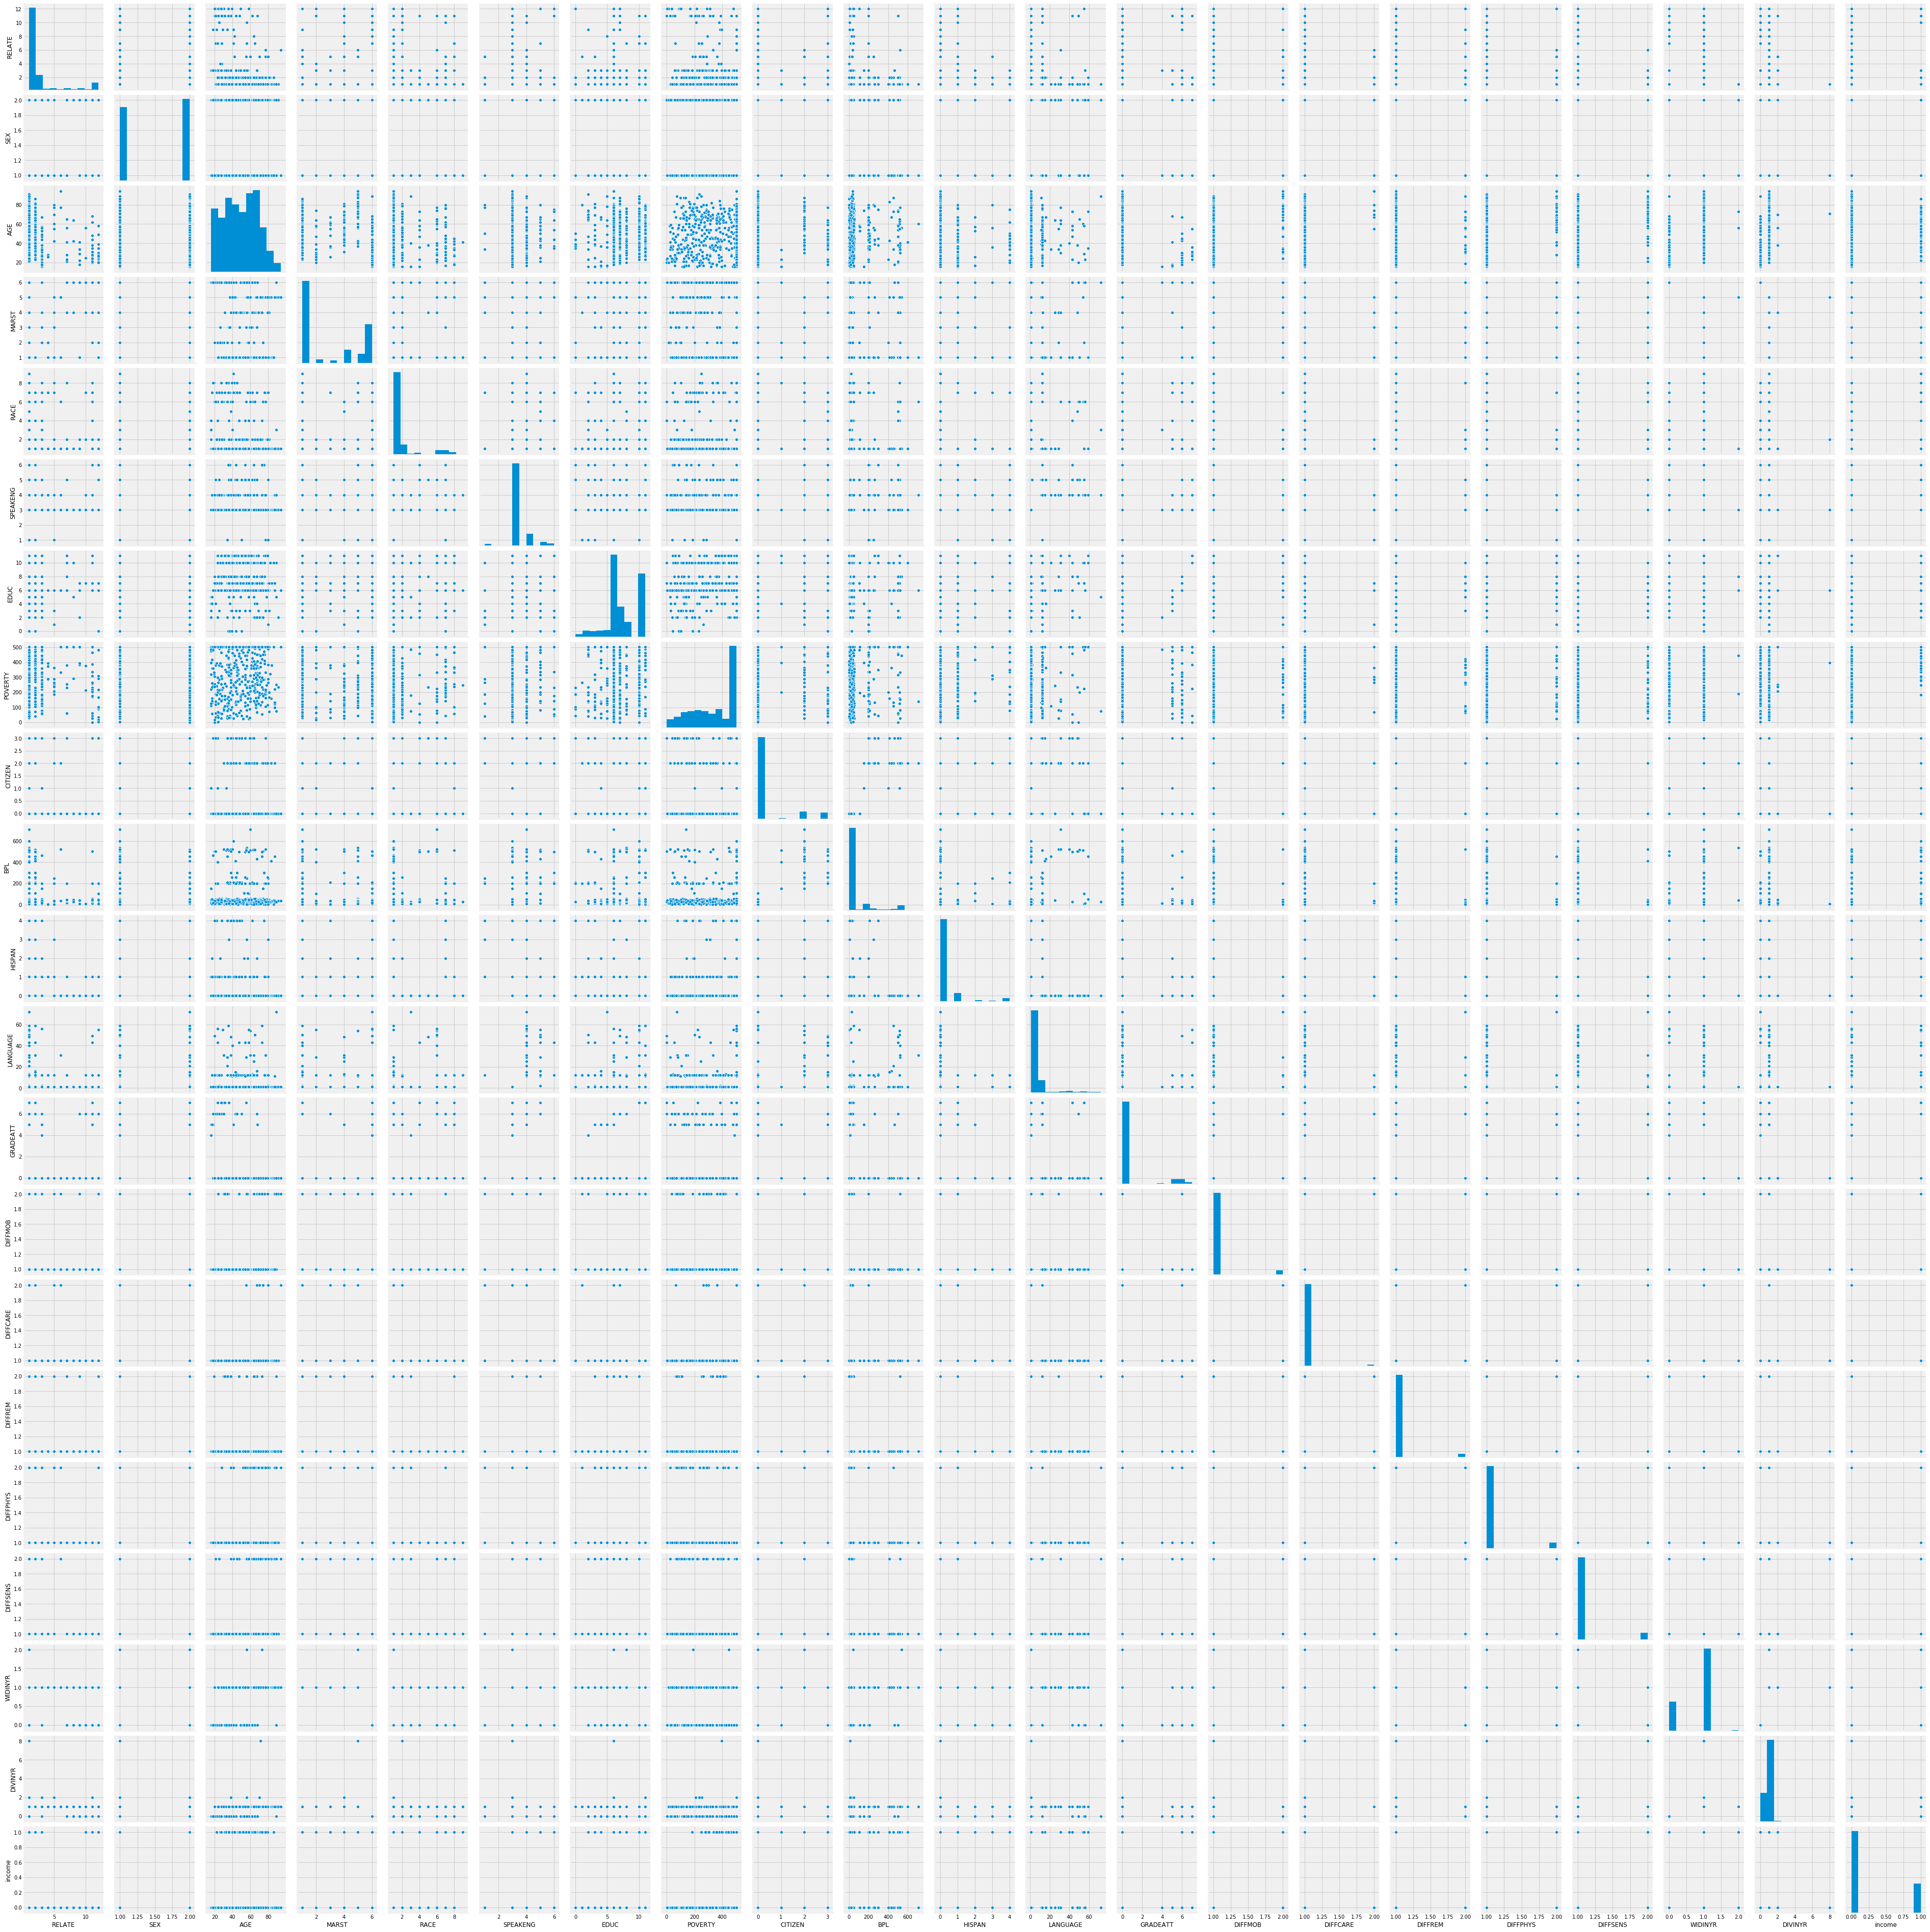

In [29]:
sns.pairplot(train_df.sample(500))

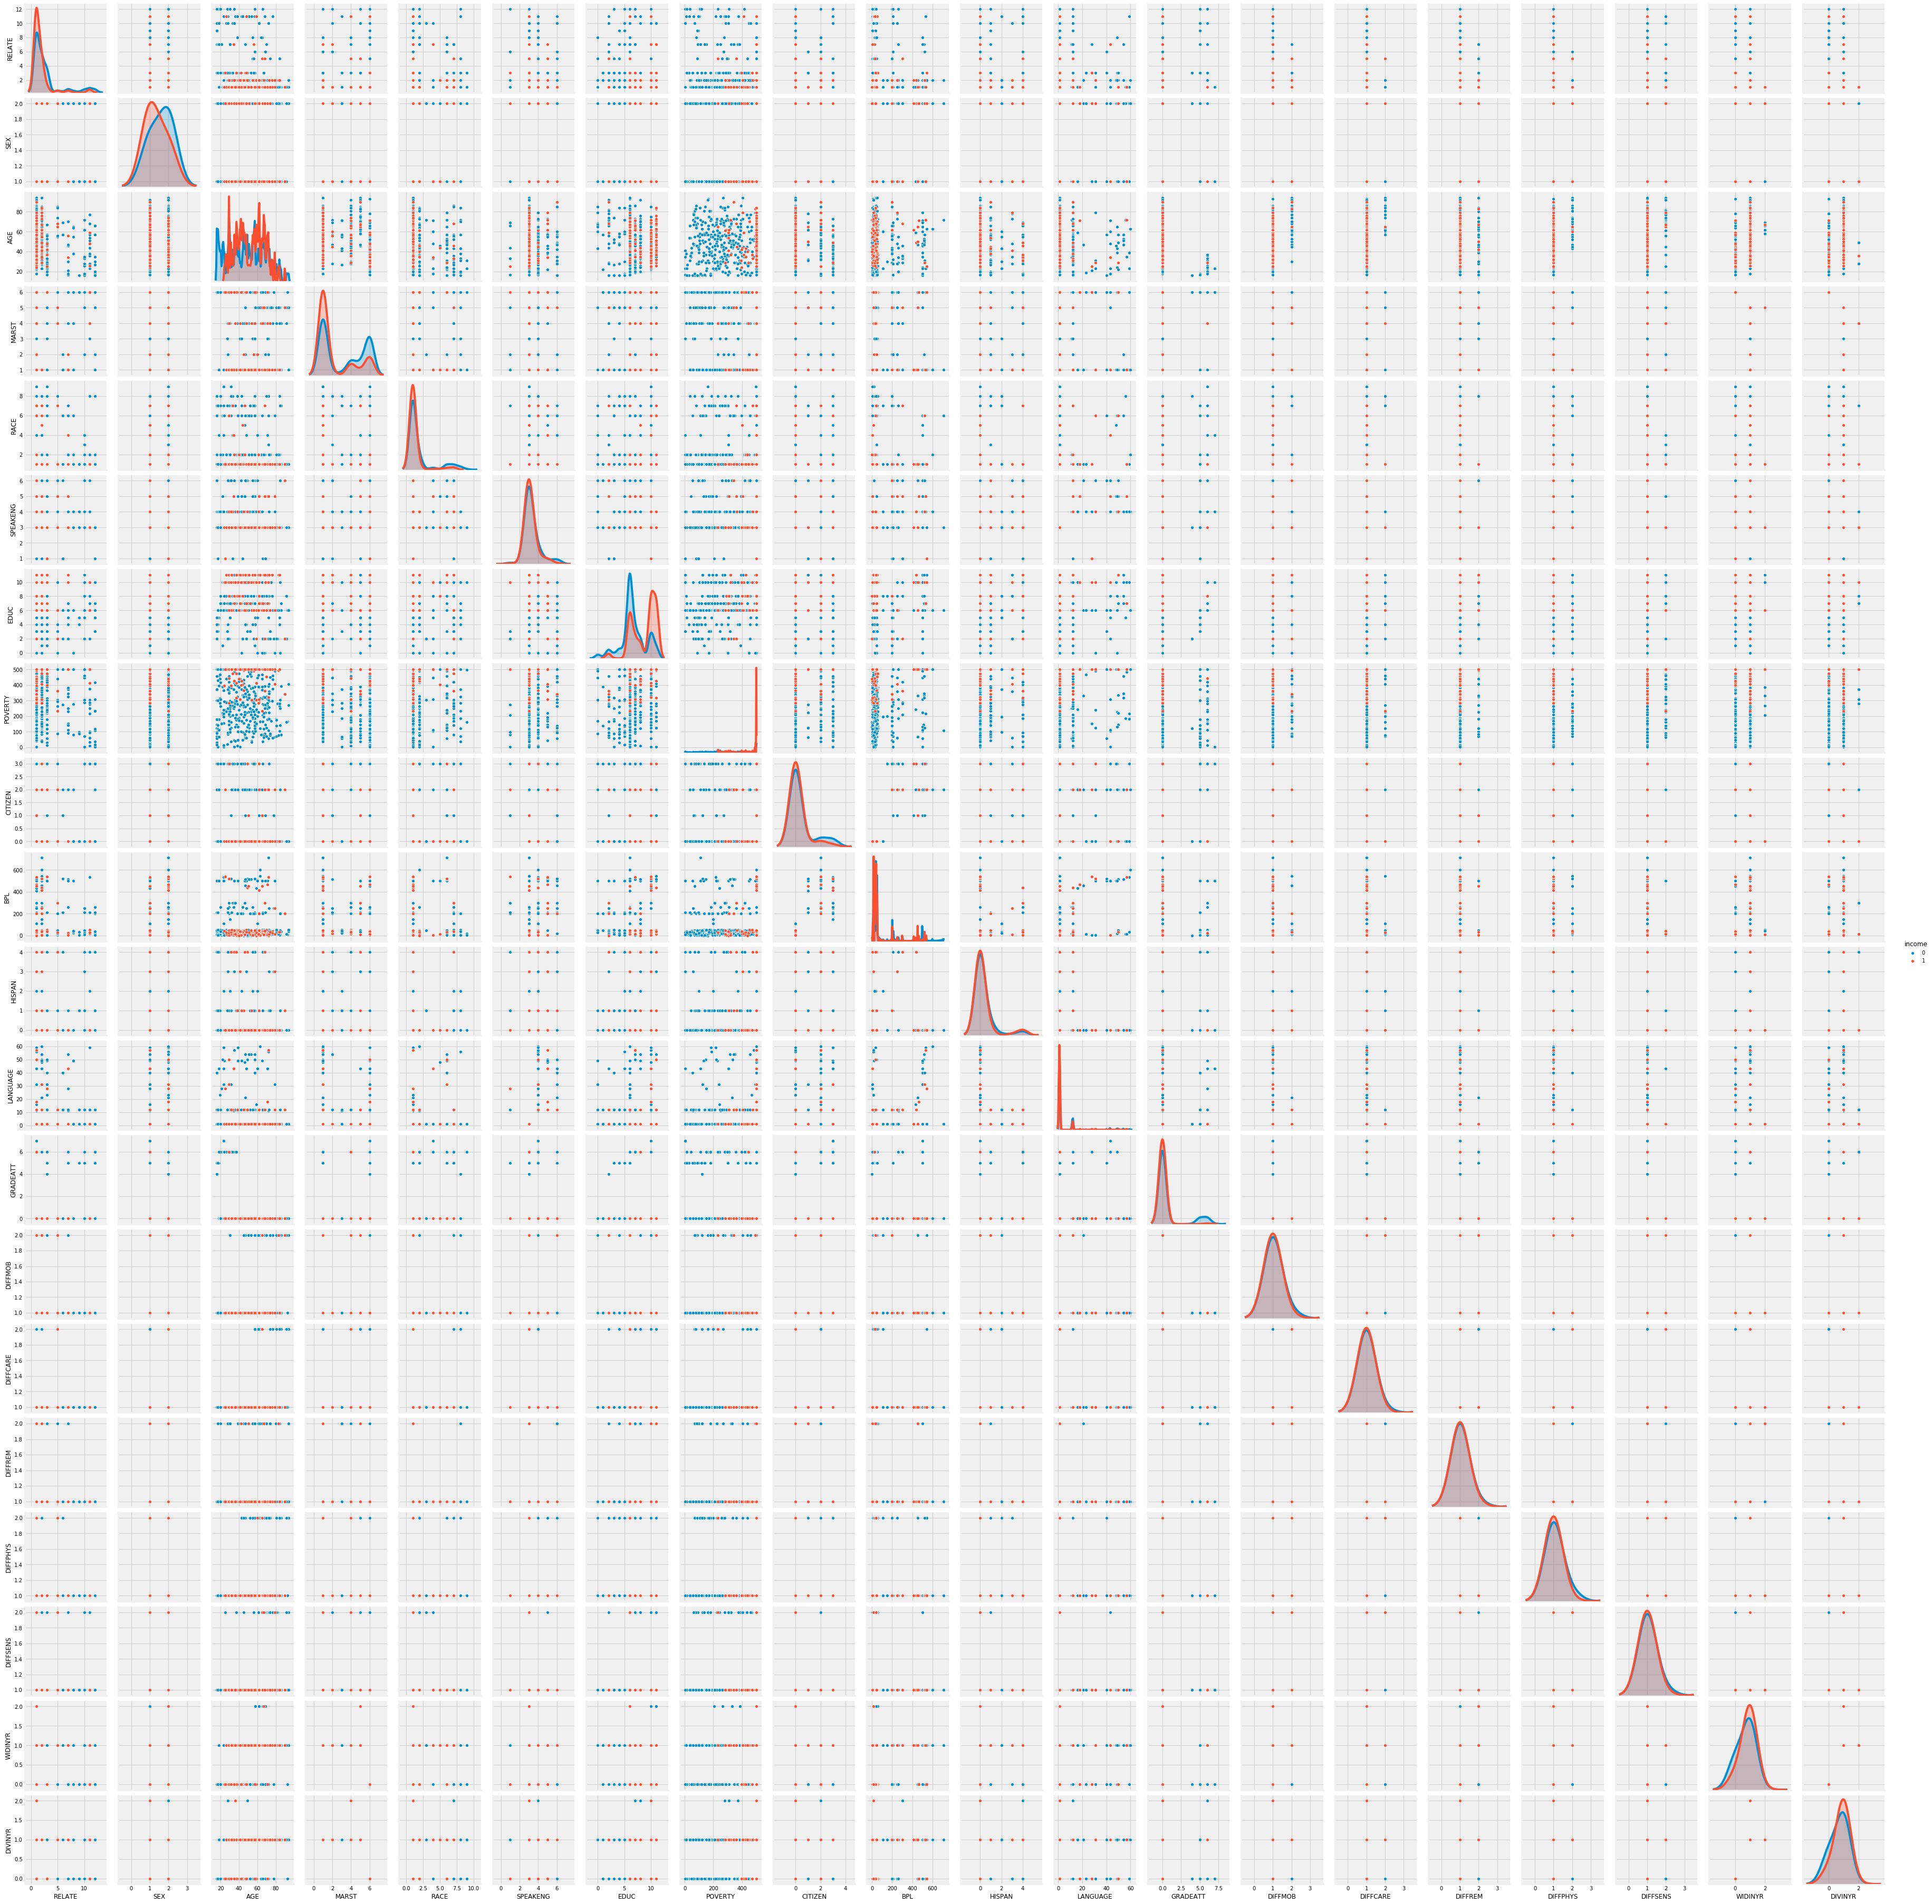

In [30]:
sns.pairplot(train_df.sample(500), hue='income', diag_kws={'bw':0.5})

In [ ]:
# low_incomet = df[df['INCTOT'] <= 12000]
# med_low_incomet = df[(df['INCTOT'] > 12000) & (df['INCTOT'] < 50000)]
# med_high_incomet = df[(df['INCTOT'] > 50000)& (df['INCTOT'] < 100000)]
# high_incomet = df[df['INCTOT'] > 100000]

# incomest = [low_incomet['INCTOT'], med_low_incomet['INCTOT'], med_high_incomet['INCTOT'], high_incomet['INCTOT']]
# for income in incomest:
#     print(income.describe().round(2))

In [53]:
highest_score = 0
names = ('one', 'two')
for column1 in train_df.columns:
    for column2 in train_df.columns:
        if column1 != column2:
            std_scale = StandardScaler()

            X_train = train_df[[column1, column2]]
            X_train_scaled = std_scale.fit_transform(X_train)

            lm3 = LogisticRegression()

            lm3.fit(X_train_scaled, y_train)

            y_predict = lm3.predict(X_train_scaled)

            score = lm3.score(X_train_scaled, y_train)
            if score > highest_score:
                highest_score = score
                names = (column1, column2)
            print('-------')
            print(' ')
            print('--------')    
            print(f'Column1: {column1}')
            print(f'Column2: {column2}')
            print(score)
            print('-------')
            print(' ')
            print('--------')
highest_score, names

               



/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: EDUC
0.7565419250506987
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: POVERTY
0.7969132857921762
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: WIDINYR
0.7141496387764898
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: DIVINYR
0.7171893033901289
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RELATE
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: EDUC
0.7569582487519066
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: POVERTY
0.8021519420999067
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: WIDINYR
0.7165427476662047
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: DIVINYR
0.7165106455976779
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SEX
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: EDUC
0.7397364921768764
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: POVERTY
0.7927982018828866
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: WIDINYR
0.7134459012430021
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: DIVINYR
0.7146085980374601
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: AGE
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: EDUC
0.747403369011773
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: POVERTY
0.79096537440793
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: WIDINYR
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: DIVINYR
0.7172820984319644
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: MARST
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: EDUC
0.7489984405417024
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: POVERTY
0.7917027187944068
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: WIDINYR
0.7136039036115329
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: DIVINYR
0.7149657335498216
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: RACE
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: EDUC
0.7496204181194107
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: POVERTY
0.7916941916824544
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: BPL
0.7174130146801756
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: WIDINYR
0.7138100590828539
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: DIVINYR
0.7152095086326976
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: SPEAKENG
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: RELATE
0.7565419250506987
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: SEX
0.7569582487519066
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: AGE
0.7397364921768764
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: MARST
0.747403369011773
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: RACE
0.7489984405417024
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: SPEAKENG
0.7496204181194107
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: POVERTY
0.8159899400142754
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: CITIZEN
0.7495491916548667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: BPL
0.7495491916548667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: HISPAN
0.7491905513580429
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: LANGUAGE
0.7492261645903149
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: GRADEATT
0.7402120040669308
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: DIFFMOB
0.7505207808226255
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: DIFFCARE
0.7500387481999016
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: DIFFREM
0.7502790121190325
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: DIFFPHYS
0.7505298095293987
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: DIFFSENS
0.7495491916548667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: WIDINYR
0.7444449627590926
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: DIVINYR
0.7443722315100864
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: EDUC
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: RELATE
0.7969132857921762
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: SEX
0.8021519420999067
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: AGE
0.7927982018828866
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: MARST
0.79096537440793
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: RACE
0.7917027187944068
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: SPEAKENG
0.7916941916824544
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: EDUC
0.8159899400142754
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: CITIZEN
0.7913781869453929
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: BPL
0.7915065952195004
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: HISPAN
0.7917488655179142
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: LANGUAGE
0.7914619532804552
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: GRADEATT
0.8109699790483843
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: DIFFMOB
0.7948251465534667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: DIFFCARE
0.7926427074884596
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: DIFFREM
0.7941901275104194
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: DIFFPHYS
0.7927495471852756
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: DIFFSENS
0.7914995728920101
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: WIDINYR
0.8038824442314338
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: DIVINYR
0.8037274514318274
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: POVERTY
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: EDUC
0.7495491916548667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: POVERTY
0.7913781869453929
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: BPL
0.7171757603299691
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: WIDINYR
0.7136324945163146
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: DIVINYR
0.7150500014797048
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: CITIZEN
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: SPEAKENG
0.7174130146801756
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: EDUC
0.7495491916548667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: POVERTY
0.7915065952195004
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: CITIZEN
0.7171757603299691
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: WIDINYR
0.7134459012430021
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: DIVINYR
0.7146085980374601
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: BPL
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: EDUC
0.7491905513580429
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: POVERTY
0.7917488655179142
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: WIDINYR
0.7136329961111354
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: DIVINYR
0.7151683778573976
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: HISPAN
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: EDUC
0.7492261645903149
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: POVERTY
0.7914619532804552
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: WIDINYR
0.7136189514561548
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: DIVINYR
0.7147360031219262
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: LANGUAGE
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: EDUC
0.7402120040669308
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: POVERTY
0.8109699790483843
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: WIDINYR
0.7135010766732827
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: DIVINYR
0.7171893033901289
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: GRADEATT
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: EDUC
0.7505207808226255
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: POVERTY
0.7948251465534667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: WIDINYR
0.7142564784733059
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: DIVINYR
0.7149085517402581
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFMOB
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: EDUC
0.7500387481999016
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: POVERTY
0.7926427074884596
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: WIDINYR
0.7138727584354455
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: DIVINYR
0.7147520541561896
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFCARE
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: EDUC
0.7502790121190325
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: POVERTY
0.7941901275104194
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: WIDINYR
0.7138908158489918
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: DIVINYR
0.7149587112223315
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFREM
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: EDUC
0.7505298095293987
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: POVERTY
0.7927495471852756
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: DIFFSENS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: WIDINYR
0.7146070932529979
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: DIVINYR
0.7150324456609791
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFPHYS
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: RELATE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: SEX
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: AGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: RACE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: SPEAKENG
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: EDUC
0.7495491916548667
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: POVERTY
0.7914995728920101
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: CITIZEN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: BPL
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: HISPAN
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: LANGUAGE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: GRADEATT
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: DIFFMOB
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: DIFFCARE
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: DIFFREM
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: DIFFPHYS
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: WIDINYR
0.7142981108434266
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: DIVINYR
0.7148809640251179
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIFFSENS
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: RELATE
0.7141496387764898
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: SEX
0.7165427476662047
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: AGE
0.7134459012430021
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: MARST
0.7174170274387415
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: RACE
0.7136039036115329
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: SPEAKENG
0.7138100590828539
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: EDUC
0.7444449627590926
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: POVERTY
0.8038824442314338
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: CITIZEN
0.7136324945163146
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: BPL
0.7134459012430021
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: HISPAN
0.7136329961111354
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: LANGUAGE
0.7136189514561548
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: GRADEATT
0.7135010766732827
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: DIFFMOB
0.7142564784733059
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: DIFFCARE
0.7138727584354455
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: DIFFREM
0.7138908158489918
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: DIFFPHYS
0.7146070932529979
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: DIFFSENS
0.7142981108434266
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: DIVINYR
0.7132211867633139
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: WIDINYR
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: RELATE
0.7171893033901289
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: SEX
0.7165106455976779
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: AGE
0.7146085980374601
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: MARST
0.7172820984319644
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: RACE
0.7149657335498216
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: SPEAKENG
0.7152095086326976
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: EDUC
0.7443722315100864
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: POVERTY
0.8037274514318274
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: CITIZEN
0.7150500014797048
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: BPL
0.7146085980374601
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: HISPAN
0.7151683778573976
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: LANGUAGE
0.7147360031219262
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: GRADEATT
0.7171893033901289
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: DIFFMOB
0.7149085517402581
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: DIFFCARE
0.7147520541561896
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: DIFFREM
0.7149587112223315
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: DIFFPHYS
0.7150324456609791
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: DIFFSENS
0.7148809640251179
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: WIDINYR
0.7132211867633139
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: DIVINYR
Column2: income
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: RELATE
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: SEX
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: AGE
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: MARST
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: RACE
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: SPEAKENG
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: EDUC
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: POVERTY
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: CITIZEN
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: BPL
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: HISPAN
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: LANGUAGE
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: GRADEATT
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: DIFFMOB
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: DIFFCARE
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: DIFFREM
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: DIFFPHYS
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: DIFFSENS
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: WIDINYR
1.0
-------
 
--------


/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-------
 
--------
Column1: income
Column2: DIVINYR
1.0
-------
 
--------


(1.0, ('RELATE', 'income'))

In [50]:
#             print(f'Column1: {column1}')
#             print(f'Column2: {column2}')
#             print(score)
#             print('-------')
#             print(' ')
#             print('--------')

In [40]:
feature = train_df[['EDUC']].values
prediction_hard = lm1.predict(feature)

maskcent = (train_df['>50K'] == 'Above 50K').values

plt.plot(feature[maskcent], prediction_hard[maskcent], 'bo', label='Akshually Yes', alpha=0.2)
plt.plot(feature[~maskcent], prediction_hard[~maskcent], 'ro', label='Akshually No', alpha=0.2)
plt.xlim(-10, 20)
plt.ylim(-0.05, 1.05)
plt.xlabel('Education Level')
plt.ylabel('Make money?')

NameError: name 'lm1' is not defined

In [ ]:
lm1.predict_proba(feature)[:5, :]

In [ ]:
prediction_soft = lm1.predict_proba(feature)[:, 1]

plt.plot(feature[maskcent], prediction_soft[maskcent], 'bo', label='Akshually Makes Money', alpha=0.4)
plt.plot(feature[~maskcent], prediction_soft[~maskcent], 'ro', label='Akshually is Broke', alpha=0.4)
plt.ylim(-0.05, 1.05)
plt.ylabel('Probability of Making Scrilla')
plt.xlabel('Num Educayshuns')
plt.title("Probability of Makin' Paper")
plt.legend(loc='upper left');

In [ ]:
confusion_matrix(y_train, prediction_hard)

In [ ]:
sum(prediction_hard[maskcent] == 0)

In [ ]:
keep_above_mask = ((train_df['>50K'] == 'Above 50K') & (train_df['INCTOT'] > 50000))
keep_below_mask = ((train_df['>50K'] == 'Below 50K') & (train_df['INCTOT'] < 50000))
cheat_df = train_df[keep_above_mask | keep_below_mask]

In [ ]:
lm2 = LogisticRegression(C=1000)
lm2.fit(cheat_df[['INCTOT']], cheat_df['>50K'])

In [ ]:
feature = cheat_df[['INCTOT']].values
prediction_hard = lm1.predict(feature)

income_mask = (cheat_df['income'] == 1).values

plt.plot(feature[income_mask], prediction_hard[income_mask], 'bo', label='Actually above 50k')
plt.plot(feature[~income_mask], prediction_hard[~income_mask], 'ro', label='Actually below 50k')
plt.ylim(-0.05, 1.05)
plt.xlabel('Real amount of income')
plt.ylabel('Prediction - 1=HasPaper')
plt.legend(loc='lower right');

In [ ]:
prediction_soft = lm2.predict_proba(feature)[:, 1]

plt.plot(feature[income_mask], prediction_soft[income_mask], 'bo', label='Definitely Over')
plt.plot(feature[~income_mask], prediction_soft[~income_mask], 'ro', label='Definitely Under')
plt.ylim(-0.05, 1.05)
plt.xlabel('Real income')
plt.ylabel('probability of making stacks')
plt.gca().axvline(25.6, c='k', ls='--', lw=1)
plt.legend(loc='lower right');